In [1]:
# import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import itertools

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('LMP_YarraRiver_WQ.xlsx')

new_column_names = {
    'TSS(mg/L)': 'TSS',
    'TP(mg/L)': 'TP',
    'TN(mg/L)': 'TN',
    'TDN (mg/L)': 'TDN',
    'NH3 (mg/L)': 'NH3',
    'NOX (mg/L)': 'NOX',
    'Turbidity Check (NTU)': 'Turbidity'
}
df = df.rename(columns=new_column_names)

df.head()

,Site,Event,Sample ID,Weather,Sample type,Collection Date,DateTime 1 (AEST),DateTime 2 (AEST),DateTime 3 (AEST),DateTime 4 (AEST),TSS,TP,TN,TDN,NH3,NOX,Turbidity
0,YR,1.0,3,WET,Discrete,2021-03-11,2021-03-10 13:00:00,2021-03-10 13:30:00,2021-03-10 14:00:00,2021-03-10 14:30:00,45,NaN,NaN,NaN,NaN,NaN,NaN
1,YR,1.0,4,WET,Discrete,2021-03-11,2021-03-10 15:00:00,2021-03-10 15:30:00,2021-03-10 16:00:00,2021-03-10 16:30:00,22,0.05,0.59,NaN,NaN,NaN,NaN
2,YR,1.0,5,WET,Discrete,2021-03-11,2021-03-10 17:00:00,2021-03-10 17:30:00,2021-03-10 18:00:00,2021-03-10 18:30:00,19,NaN,NaN,NaN,NaN,NaN,NaN
3,YR,1.0,6,WET,Discrete,2021-03-11,2021-03-10 19:00:00,2021-03-10 19:30:00,2021-03-10 20:00:00,2021-03-10 20:30:00,24,0.04,0.55,NaN,NaN,NaN,NaN
4,YR,1.0,7,WET,Discrete,2021-03-11,2021-03-10 21:00:00,2021-03-10 21:30:00,2021-03-10 22:00:00,2021-03-10 22:30:00,17,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Site               156 non-null    object        
 1   Event              123 non-null    float64       
 2   Sample ID          156 non-null    object        
 3   Weather            156 non-null    object        
 4   Sample type        156 non-null    object        
 5   Collection Date    156 non-null    datetime64[ns]
 6   DateTime 1 (AEST)  156 non-null    datetime64[ns]
 7   DateTime 2 (AEST)  124 non-null    datetime64[ns]
 8   DateTime 3 (AEST)  124 non-null    datetime64[ns]
 9   DateTime 4 (AEST)  121 non-null    datetime64[ns]
 10  TSS                156 non-null    int64         
 11  TP                 151 non-null    float64       
 12  TN                 151 non-null    float64       
 13  TDN                70 non-null     float64       
 14  NH3       

In [4]:
# Shape of the dataframe
print(df.shape)
# Find the number of rows within a dataframe
print(len(df))
# Extracting information from the shape tuple
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

(156, 17)
156
Number of rows: 156 
Number of columns: 17


**Summary statistics**

In [5]:
# Change weather: WET = 1, DEY = 0
df['Weather'] = df['Weather'].map({'WET': 1, 'DRY': 0})
df

,Site,Event,Sample ID,Weather,Sample type,Collection Date,DateTime 1 (AEST),DateTime 2 (AEST),DateTime 3 (AEST),DateTime 4 (AEST),TSS,TP,TN,TDN,NH3,NOX,Turbidity
0,YR,1.0,3,1,Discrete,2021-03-11,2021-03-10 13:00:00,2021-03-10 13:30:00,2021-03-10 14:00:00,2021-03-10 14:30:00,45,NaN,NaN,NaN,NaN,NaN,NaN
1,YR,1.0,4,1,Discrete,2021-03-11,2021-03-10 15:00:00,2021-03-10 15:30:00,2021-03-10 16:00:00,2021-03-10 16:30:00,22,0.05,0.59,NaN,NaN,NaN,NaN
2,YR,1.0,5,1,Discrete,2021-03-11,2021-03-10 17:00:00,2021-03-10 17:30:00,2021-03-10 18:00:00,2021-03-10 18:30:00,19,NaN,NaN,NaN,NaN,NaN,NaN
3,YR,1.0,6,1,Discrete,2021-03-11,2021-03-10 19:00:00,2021-03-10 19:30:00,2021-03-10 20:00:00,2021-03-10 20:30:00,24,0.04,0.55,NaN,NaN,NaN,NaN
4,YR,1.0,7,1,Discrete,2021-03-11,2021-03-10 21:00:00,2021-03-10 21:30:00,2021-03-10 22:00:00,2021-03-10 22:30:00,17,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,YR,21.0,3,1,Discrete,2022-08-19,2022-08-19 02:03:00,2022-08-19 02:45:00,2022-08-19 03:21:00,2022-08-19 03:57:00,200,0.24,1.90,NaN,NaN,NaN,77.1
152,YR,21.0,5,1,Discrete,2022-08-19,2022-08-19 07:09:00,2022-08-19 07:45:00,2022-08-19 08:21:00,2022-08-19 08:57:00,210,0.12,0.93,NaN,NaN,NaN,81.6
153,YR,NaN,Pump,1,Grab,2022-08-19,2022-08-19 09:50:00,NaT,NaT,NaT,220,0.11,0.93,NaN,NaN,NaN,55.0
154,YR,NaN,Manual,1,Grab,2022-08-19,2022-08-19 09:50:00,NaT,NaT,NaT,140,0.07,0.75,NaN,NaN,NaN,38.3


In [6]:
included_columns = df.drop(columns=['Event', 'Collection Date','DateTime 1 (AEST)','DateTime 2 (AEST)','DateTime 3 (AEST)','DateTime 4 (AEST)'])
included_columns.describe()

,Weather,TSS,TP,TN,TDN,NH3,NOX,Turbidity
count,156.000000,156.000000,151.000000,151.000000,70.000000,70.000000,70.000000,134.000000
mean,0.846154,96.538462,0.136358,1.123046,0.491571,0.008579,0.118871,46.096517
std,0.361963,95.473447,0.098139,0.648384,0.226739,0.024832,0.148945,37.505237
min,0.000000,10.000000,0.030000,0.200000,0.210000,0.000500,0.000500,5.620000
25%,1.000000,28.750000,0.070000,0.645000,0.330000,0.002000,0.001000,21.108333
50%,1.000000,53.500000,0.100000,0.960000,0.445000,0.004000,0.025000,32.550000
75%,1.000000,130.000000,0.170000,1.500000,0.577500,0.006000,0.247500,64.350000
max,1.000000,460.000000,0.530000,3.600000,1.300000,0.200000,0.550000,213.000000


In [7]:
included_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Weather,156.0,0.846154,0.361963,0.0000,1.000000,1.000,1.0000,1.00
TSS,156.0,96.538462,95.473447,10.0000,28.750000,53.500,130.0000,460.00
TP,151.0,0.136358,0.098139,0.0300,0.070000,0.100,0.1700,0.53
TN,151.0,1.123046,0.648384,0.2000,0.645000,0.960,1.5000,3.60
TDN,70.0,0.491571,0.226739,0.2100,0.330000,0.445,0.5775,1.30
NH3,70.0,0.008579,0.024832,0.0005,0.002000,0.004,0.0060,0.20
NOX,70.0,0.118871,0.148945,0.0005,0.001000,0.025,0.2475,0.55
Turbidity,134.0,46.096517,37.505237,5.6200,21.108333,32.550,64.3500,213.00


**Missing values**

In [8]:
df.isnull().sum()

Site                  0
Event                33
Sample ID             0
Weather               0
Sample type           0
Collection Date       0
DateTime 1 (AEST)     0
DateTime 2 (AEST)    32
DateTime 3 (AEST)    32
DateTime 4 (AEST)    35
TSS                   0
TP                    5
TN                    5
TDN                  86
NH3                  86
NOX                  86
Turbidity            22
dtype: int64

In [9]:
# Proportion of missing values by column
def isnull_prop(df):
    total_rows = df.shape[0]
    missing_val_dict = {}
    for col in df.columns:
        missing_val_dict[col] = [df[col].isnull().sum(), (df[col].isnull().sum() / total_rows)]
    return missing_val_dict

# Apply the missing value method
null_dict = isnull_prop(df)
print(null_dict.items())

dict_items([('Site', [0, 0.0]), ('Event', [33, 0.21153846153846154]), ('Sample ID', [0, 0.0]), ('Weather', [0, 0.0]), ('Sample type', [0, 0.0]), ('Collection Date', [0, 0.0]), ('DateTime 1 (AEST)', [0, 0.0]), ('DateTime 2 (AEST)', [32, 0.20512820512820512]), ('DateTime 3 (AEST)', [32, 0.20512820512820512]), ('DateTime 4 (AEST)', [35, 0.22435897435897437]), ('TSS', [0, 0.0]), ('TP', [5, 0.03205128205128205]), ('TN', [5, 0.03205128205128205]), ('TDN', [86, 0.5512820512820513]), ('NH3', [86, 0.5512820512820513]), ('NOX', [86, 0.5512820512820513]), ('Turbidity', [22, 0.14102564102564102])])


In [10]:
# Create a dataframe of the missing value information
df_missing = pd.DataFrame.from_dict(null_dict, orient="index", columns=['missing', 'miss_percent'])
df_missing

,missing,miss_percent
Site,0,0.000000
Event,33,0.211538
Sample ID,0,0.000000
Weather,0,0.000000
Sample type,0,0.000000
Collection Date,0,0.000000
DateTime 1 (AEST),0,0.000000
DateTime 2 (AEST),32,0.205128
DateTime 3 (AEST),32,0.205128
DateTime 4 (AEST),35,0.224359


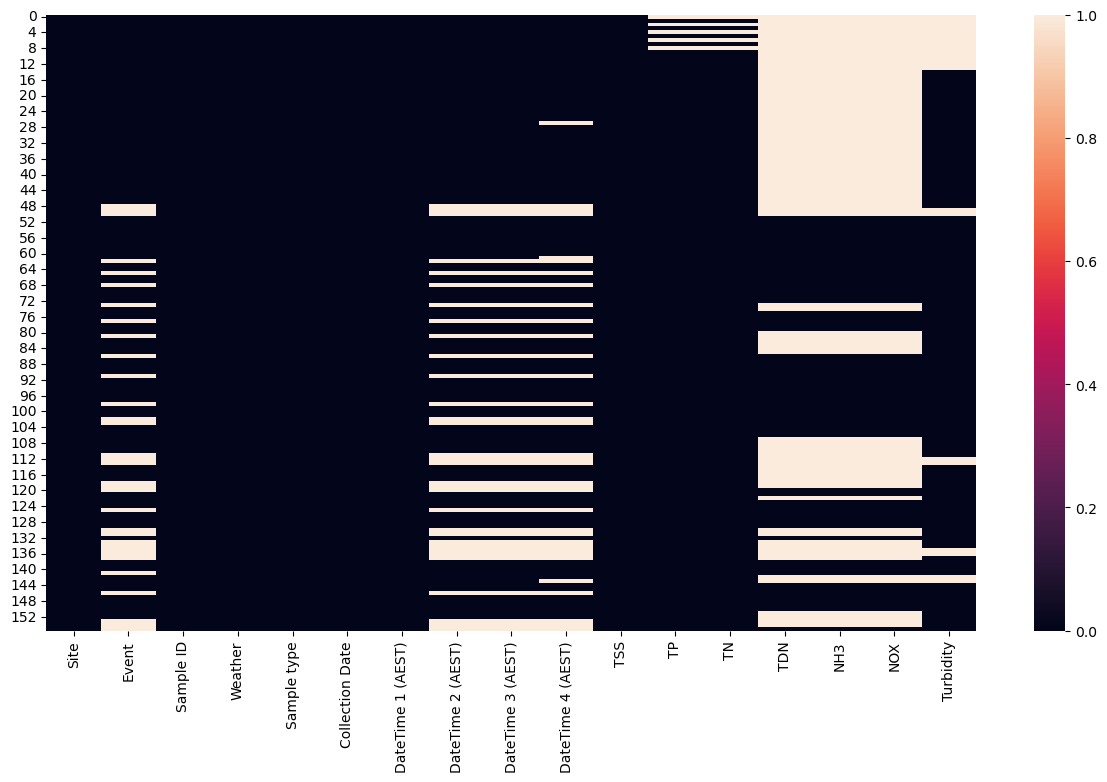

In [11]:
# Display missing values using a heatmap to understand if any patterns are present
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull());

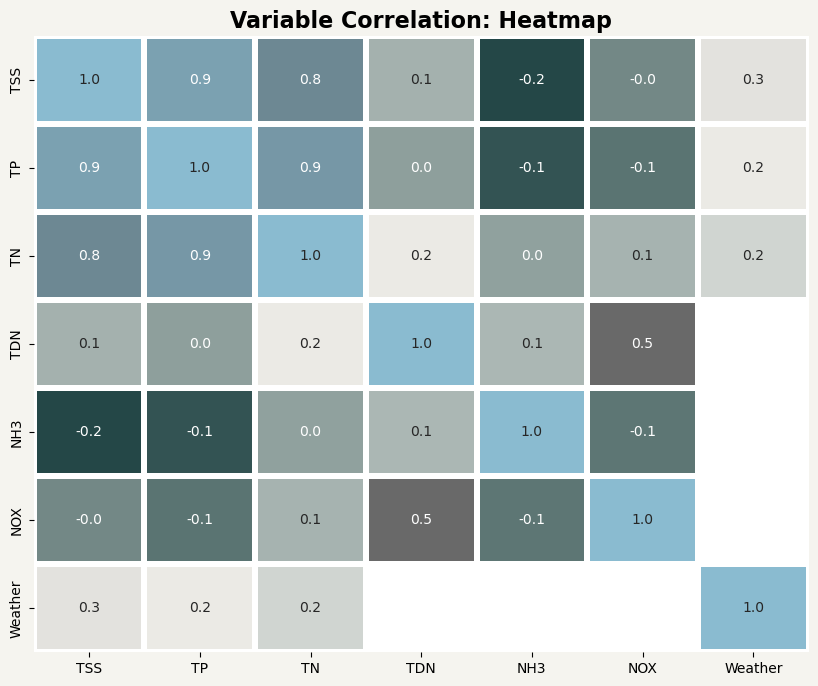

In [12]:
colors = ["#244747","#f5f4ef", "#4b4b4c","#8abbd0"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
background_color='#F5F4EF'

selected_columns = ['TSS', 'TP', 'TN', 'TDN', 'NH3', 'NOX','Weather']
corr = df[selected_columns].corr()
fig, ax = plt.subplots(1, 1, figsize=(10, 8), facecolor=background_color)
sns.heatmap(corr, linewidth=3, annot=True, fmt='.1f', cbar=False, cmap=colormap, ax=ax)
ax.set_title('Variable Correlation: Heatmap', fontsize=16, fontweight='bold')

plt.show()

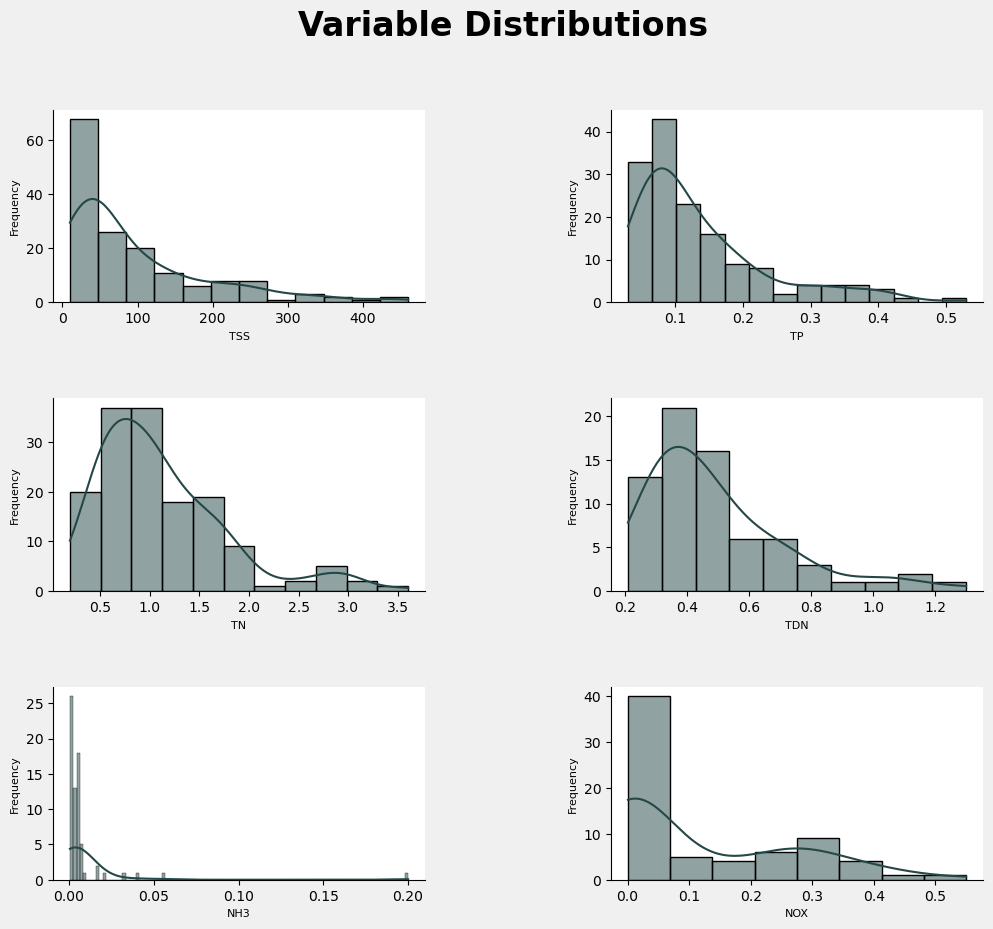

In [13]:
numeric_columns = df[selected_columns].select_dtypes(include='number').columns
df_numeric = df[numeric_columns]

# Setting up the figure and axes
fig, axs = plt.subplots(3, 2, figsize=(12, 10))  # Adjust the layout size if needed
fig.subplots_adjust(hspace=0.5, wspace=0.5)
background_color = '#f0f0f0'  # Define your preferred background color
fig.patch.set_facecolor(background_color)

# Flattening the axis array for easy indexing
axs = axs.flatten()

# Plotting each variable distribution
for i, column in enumerate(df_numeric.columns):
    if i >= len(axs):  # Check if number of columns exceeds available subplots
        break
    ax = axs[i]
    sns.histplot(df_numeric[column], kde=True, ax=ax, color='#244747', edgecolor='black')
    ax.set_xlabel(column, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    sns.despine(ax=ax)

# Adjust unused subplots
for j in range(len(df_numeric.columns), len(axs)):
    axs[j].set_visible(False)  # Hide unused subplots

# Adding a title
fig.suptitle('Variable Distributions', fontsize=24, fontweight='bold')

plt.show()

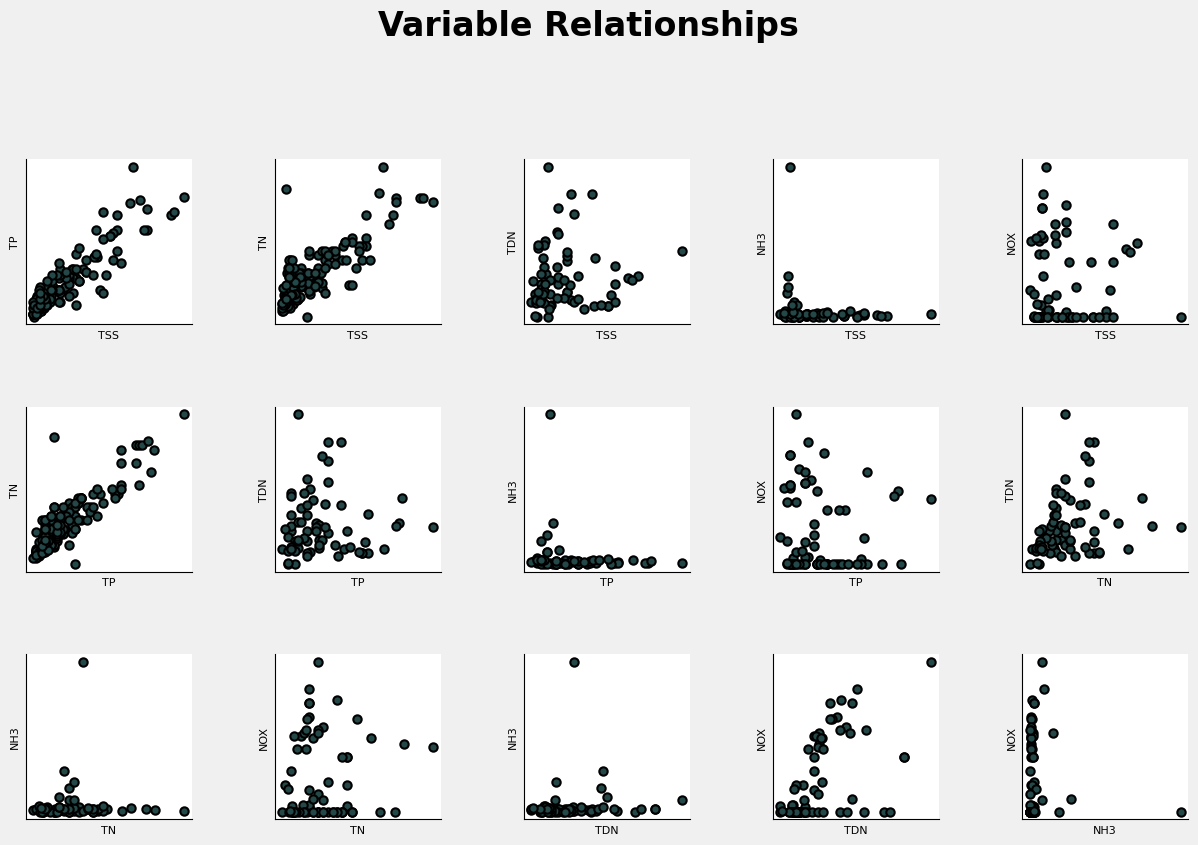

In [14]:
variables = ['TSS', 'TP', 'TN', 'TDN', 'NH3', 'NOX']
combinations = list(itertools.combinations(variables, 2))

# Setting up the figure and axes
fig, axs = plt.subplots(5, 5, figsize=(15, 15))  # Adjust the layout size if needed
fig.subplots_adjust(hspace=0.5, wspace=0.5)
background_color = '#f0f0f0'  # Define your preferred background color
fig.patch.set_facecolor(background_color)

# Flattening the axis array for easy indexing
axs = axs.flatten()

# Plotting each pair
for i, (x_var, y_var) in enumerate(combinations):
    ax = axs[i]
    sns.scatterplot(x=x_var, y=y_var, data=df, ax=ax, color='#244747', edgecolor='black', lw=1.5)
    ax.set_xlabel(x_var, fontsize=8)
    ax.set_ylabel(y_var, fontsize=8)
    ax.set_xticks([])  # Hide x ticks
    ax.set_yticks([])  # Hide y ticks
    sns.despine(ax=ax, trim=True)

# Adjust unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)  # Hide unused subplots

# Adding a title
fig.suptitle('Variable Relationships', fontsize=24, fontweight='bold')

plt.show()

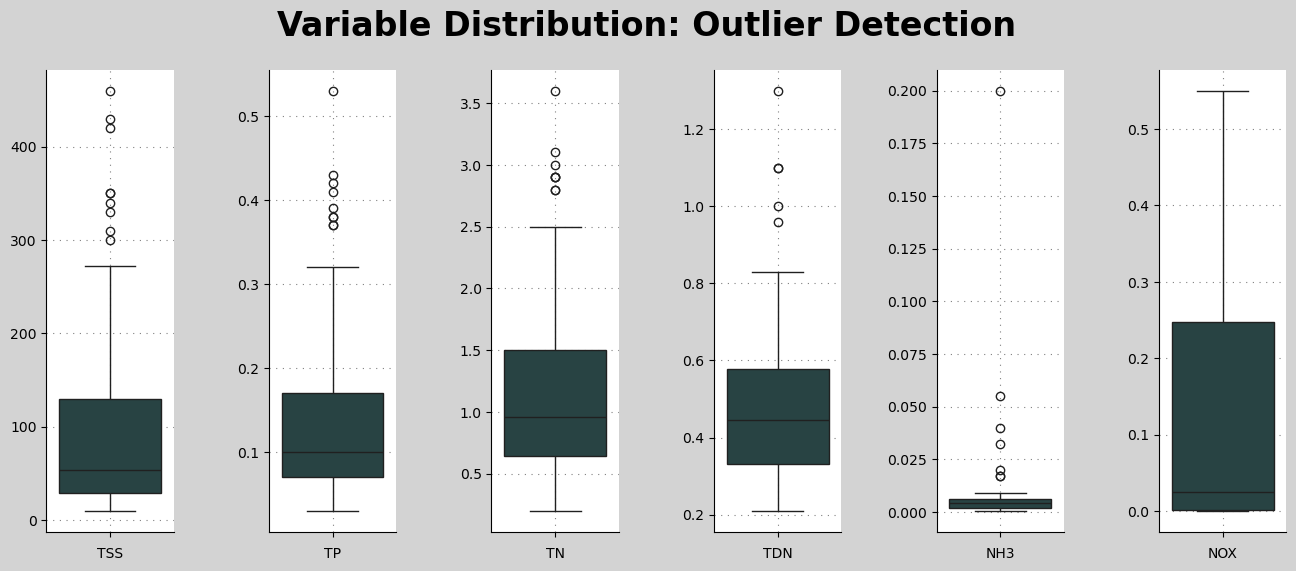

In [15]:
df_selected = df[selected_columns]

# Setting up the figure and axes
fig, axs = plt.subplots(1, len(selected_columns)-1, figsize=(16, 6), facecolor='lightgrey')
fig.subplots_adjust(wspace=0.75, hspace=0.4)

# Plotting boxplots for each variable
for i, variable in enumerate(selected_columns[:-1]):
    sns.boxplot(data=df_selected, y=df_selected[variable], ax=axs[i], color='#244747')
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('')
    axs[i].grid(which='both', axis='both', zorder=5, color='gray', linestyle=':', dashes=(1,5))
    axs[i].set_axisbelow(True)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

# Adding a title
fig.suptitle('Variable Distribution: Outlier Detection', fontsize=24, fontweight='bold')

plt.show()

In [16]:
df1 = (df.assign(Weather=lambda df_:df_.Weather.fillna(df_.Weather.mean()),
            TSS=lambda df_:df_.TSS.fillna(df_.TSS.mean()),
            TP=lambda df_:df_.TP.fillna(df_.TP.mean()),
            TN=lambda df_:df_.TN.fillna(df_.TN.mean()),
            TDN=lambda df_:df_.TDN.fillna(df_.TDN.mean()),
            NH3=lambda df_:df_.NH3.fillna(df_.NH3.mean()),
            NOX=lambda df_:df_.NOX.fillna(df_.NOX.mean()),
            Turbidity=lambda df_:df_.Turbidity.fillna(df_.Turbidity.mean())
           )
)
df1.head()

,Site,Event,Sample ID,Weather,Sample type,Collection Date,DateTime 1 (AEST),DateTime 2 (AEST),DateTime 3 (AEST),DateTime 4 (AEST),TSS,TP,TN,TDN,NH3,NOX,Turbidity
0,YR,1.0,3,1,Discrete,2021-03-11,2021-03-10 13:00:00,2021-03-10 13:30:00,2021-03-10 14:00:00,2021-03-10 14:30:00,45,0.136358,1.123046,0.491571,0.008579,0.118871,46.096517
1,YR,1.0,4,1,Discrete,2021-03-11,2021-03-10 15:00:00,2021-03-10 15:30:00,2021-03-10 16:00:00,2021-03-10 16:30:00,22,0.050000,0.590000,0.491571,0.008579,0.118871,46.096517
2,YR,1.0,5,1,Discrete,2021-03-11,2021-03-10 17:00:00,2021-03-10 17:30:00,2021-03-10 18:00:00,2021-03-10 18:30:00,19,0.136358,1.123046,0.491571,0.008579,0.118871,46.096517
3,YR,1.0,6,1,Discrete,2021-03-11,2021-03-10 19:00:00,2021-03-10 19:30:00,2021-03-10 20:00:00,2021-03-10 20:30:00,24,0.040000,0.550000,0.491571,0.008579,0.118871,46.096517
4,YR,1.0,7,1,Discrete,2021-03-11,2021-03-10 21:00:00,2021-03-10 21:30:00,2021-03-10 22:00:00,2021-03-10 22:30:00,17,0.136358,1.123046,0.491571,0.008579,0.118871,46.096517


In [17]:
df1.isnull().sum()

Site                  0
Event                33
Sample ID             0
Weather               0
Sample type           0
Collection Date       0
DateTime 1 (AEST)     0
DateTime 2 (AEST)    32
DateTime 3 (AEST)    32
DateTime 4 (AEST)    35
TSS                   0
TP                    0
TN                    0
TDN                   0
NH3                   0
NOX                   0
Turbidity             0
dtype: int64

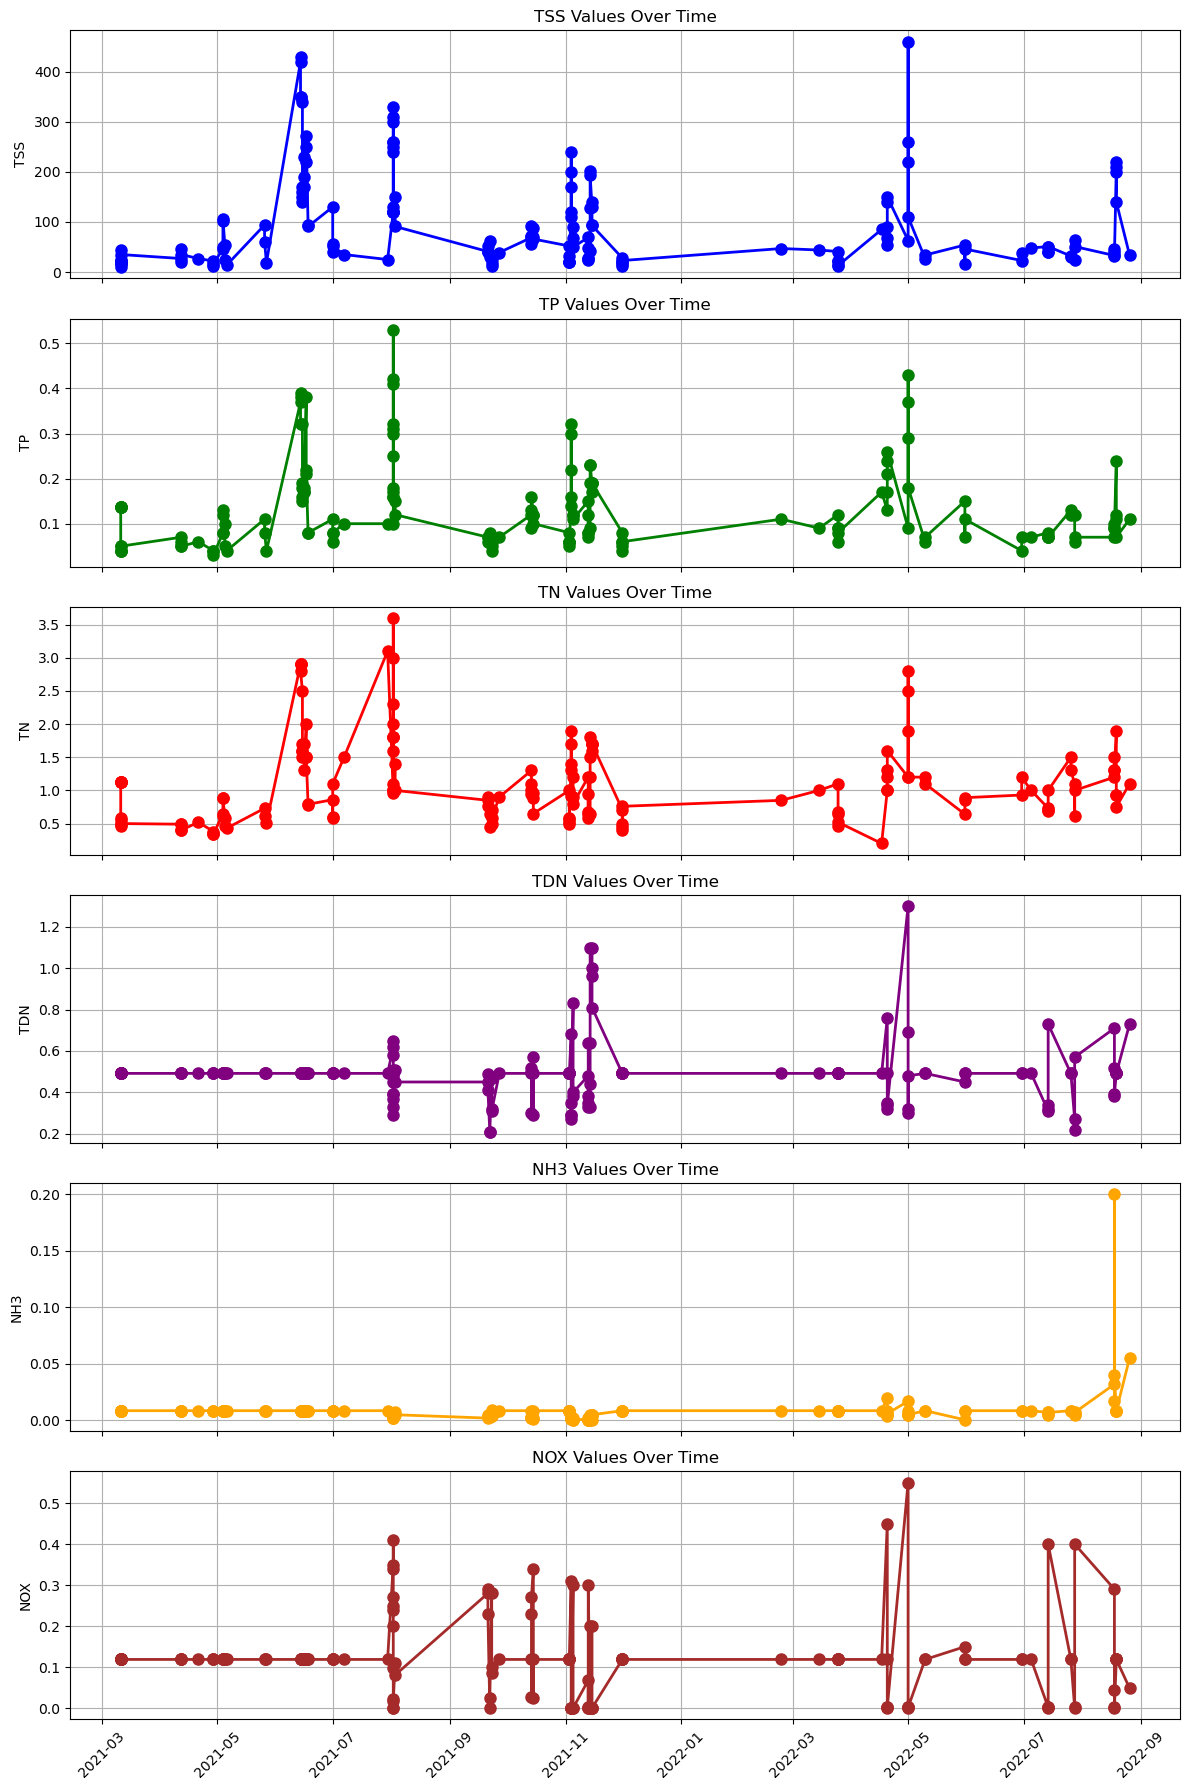

In [18]:
df1['Datetime'] = pd.to_datetime(df1['Collection Date'])
# df.set_index('Datetime', inplace=True)

# Plotting all variables over time
fig, axs = plt.subplots(6, 1, figsize=(12, 18), sharex=True)

variables = ['TSS', 'TP', 'TN', 'TDN', 'NH3', 'NOX']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for i, variable in enumerate(variables):
    axs[i].plot(df1['Datetime'], df1[variable], marker='o', color=colors[i], linestyle='-', linewidth=2, markersize=8)
    axs[i].set_title(f'{variable} Values Over Time')
    axs[i].set_ylabel(variable)
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()